In [23]:
experiment_name = "lin_data_2_10_extrapolation"

In [24]:
import numpy as np
from scipy.spatial.distance import cosine
from scipy.linalg import svd, inv
import pandas as pd
import matplotlib.pyplot as plt
import dill as pickle
import os
import pdb
import torch
import ai.causalcell
from ai.causalcell.training import set_seed
from ai.causalcell.utils import configuration
os.chdir(os.path.join(os.path.dirname(ai.__file__), ".."))
print("Working in", os.getcwd())  

Working in /Users/paul/PycharmProjects/causal_cell_embedding


In [25]:
def load_all_losses(res, name='recon_loss'):
    all_train_loss = []
    for epoch in range(len(res['losses']['train'])):
        train_loss = np.mean([res['losses']['train'][epoch][i][name].detach().numpy() 
        for i in range(len(res['losses']['train'][epoch]))])
        all_train_loss.append(train_loss)
    all_valid_loss = []
    for epoch in range(len(res['losses']['valid'])):
        valid_loss = np.mean([res['losses']['valid'][epoch][i][name].numpy() 
        for i in range(len(res['losses']['valid'][epoch]))])
        all_valid_loss.append(valid_loss)
    return all_train_loss, all_valid_loss

In [26]:
def epoch_length(i):
    return results[i]['n_samples_in_split']['train']

In [27]:
def get_tube(x_coord, valid_loss1, valid_loss2, valid_loss3):
    min_length = min(len(valid_loss1), len(valid_loss2), len(valid_loss3))
    concat_lists = np.array([valid_loss1[:min_length], valid_loss2[:min_length], valid_loss3[:min_length]])
    st_dev_list = np.std(concat_lists, 0)
    mean_list = np.mean(concat_lists, 0)
#     pdb.set_trace()
    return x_coord[:min_length], mean_list, st_dev_list

In [28]:
result_dir = os.path.join(os.getcwd(), "results", experiment_name)

In [29]:
results = []
for exp_id in range(1, 22):
    with open(os.path.join(result_dir,'results_' 
              + str(exp_id) + '.pkl'), 'rb') as f:
        results.append(pickle.load(f))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/paul/PycharmProjects/causal_cell_embedding/results/lin_data_2_10_extrapolation/results_9.pkl'

In [ ]:
all_exp_losses = []
for exp_id in range(21):
    all_exp_losses.append(load_all_losses(results[exp_id]))

In [ ]:
plt.figure(figsize=(6,4), dpi=200)
for exp_id in range(0, 21, 3):
    valid_loss1 = all_exp_losses[exp_id][1]
    valid_loss2 = all_exp_losses[exp_id + 1][1]
    valid_loss3 = all_exp_losses[exp_id + 2][1]
    x_coord =  [epoch_length(exp_id)*i for i in range(len(valid_loss1))]
    x_coord_tube, mean_list, st_dev_list = get_tube(x_coord, valid_loss1, valid_loss2, valid_loss3)
    label = list(results[exp_id]['config']['model'].keys())[0]
    plt.fill_between(x_coord_tube, mean_list - st_dev_list, mean_list + st_dev_list, alpha=.2)
    plt.plot(x_coord_tube, mean_list, label=label)
plt.title("reconstruction losses")
plt.yscale("log")
plt.xticks([])
plt.legend()
plt.show()

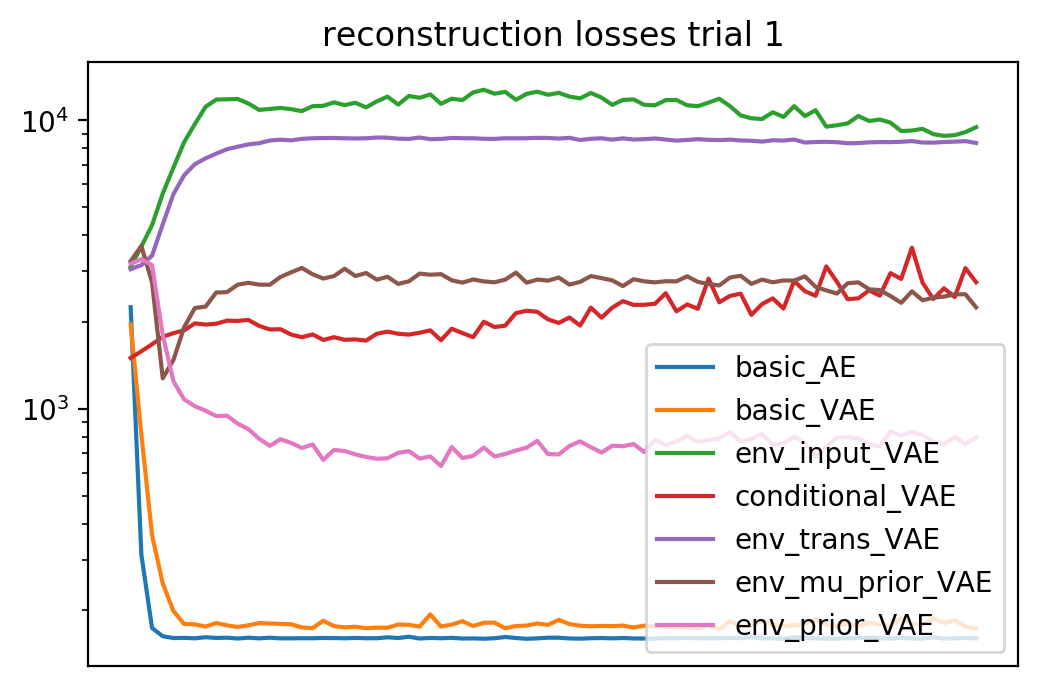

In [10]:
plt.figure(figsize=(6,4), dpi=200)
for exp_id in range(0, 21, 3):
    valid_loss = all_exp_losses[exp_id][1]
    x_coord =  [epoch_length(exp_id)*i for i in range(len(valid_loss))]
    label = list(results[exp_id]['config']['model'].keys())[0]
    plt.plot(x_coord, valid_loss, label=label)
plt.title("reconstruction losses trial 1")
plt.yscale("log")
plt.xticks([])
plt.legend()
plt.show()

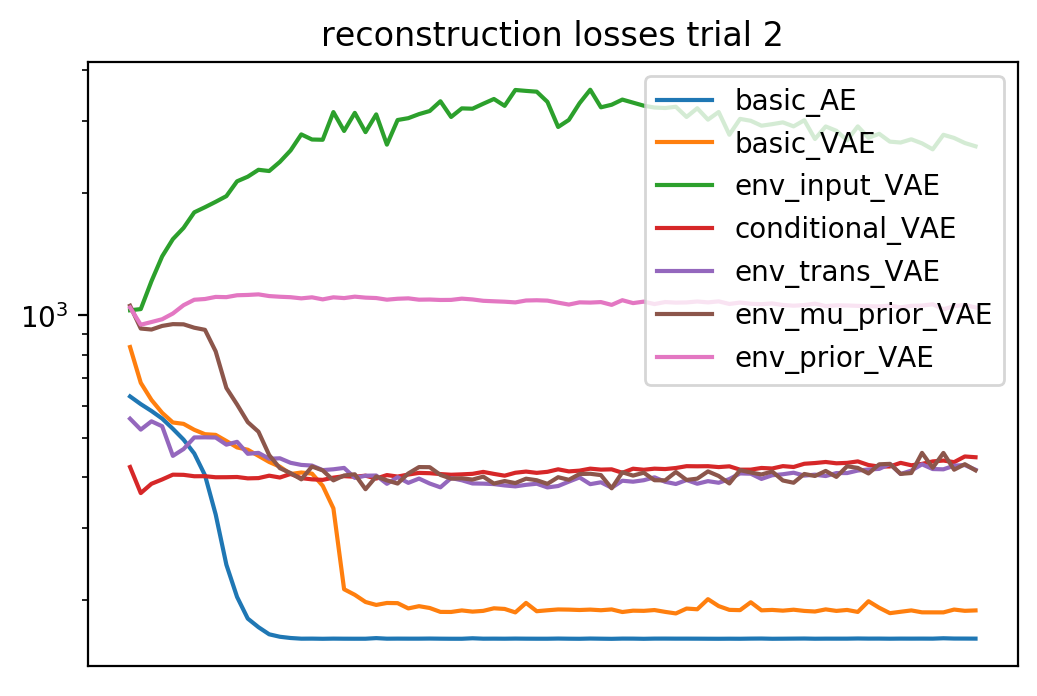

In [11]:
plt.figure(figsize=(6,4), dpi=200)
for exp_id in range(1, 21, 3):
    valid_loss = all_exp_losses[exp_id][1]
    x_coord =  [epoch_length(exp_id)*i for i in range(len(valid_loss))]
    label = list(results[exp_id]['config']['model'].keys())[0]
    plt.plot(x_coord, valid_loss, label=label)
plt.title("reconstruction losses trial 2")
plt.yscale("log")
plt.xticks([])
plt.legend()
plt.show()

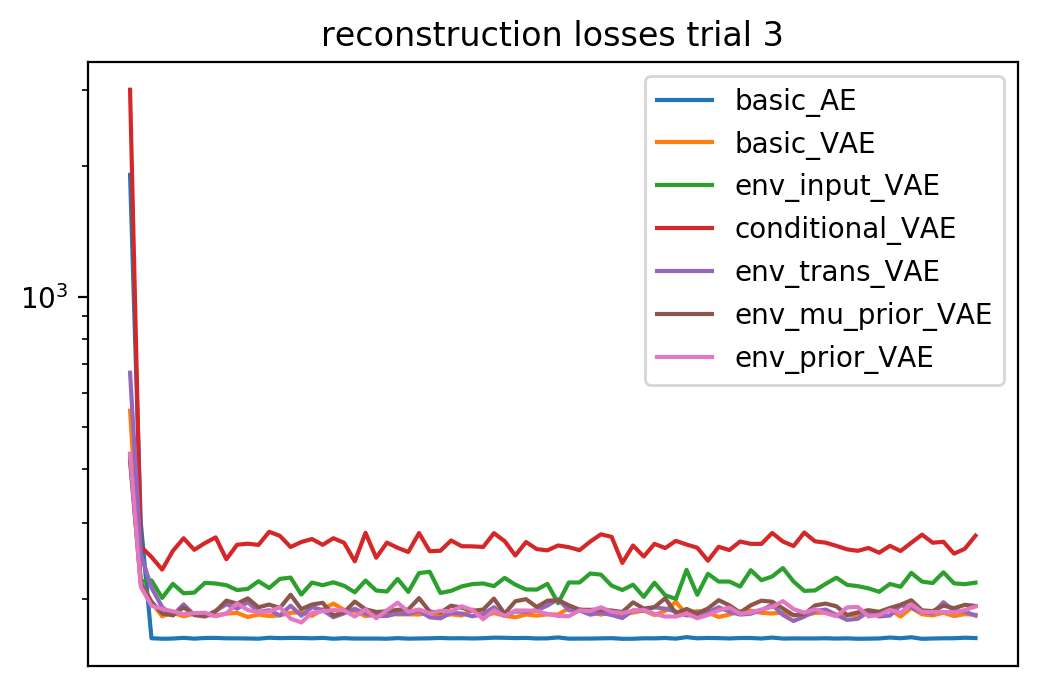

In [12]:
plt.figure(figsize=(6,4), dpi=200)
for exp_id in range(2, 21, 3):
    valid_loss = all_exp_losses[exp_id][1]
    x_coord =  [epoch_length(exp_id)*i for i in range(len(valid_loss))]
    label = list(results[exp_id]['config']['model'].keys())[0]
    plt.plot(x_coord, valid_loss, label=label)
plt.title("reconstruction losses trial 3")
plt.yscale("log")
plt.xticks([])
plt.legend()
plt.show()

In [13]:
set_seed(results[0]['seed'])
# dataloader
valid_loader = configuration.setup_dataloader(results[0]['config'], 'valid')
train_loader = configuration.setup_dataloader(results[0]['config'], 'train')
print("training envs", np.unique(train_loader.dataset.envs, axis=0))
print("valid_envs", np.unique(valid_loader.dataset.envs))

pytorch/random seed: 3
global graph created with parameters (2, 10, 0.5, 'empty', 'binary_noisy_lin_generator')
valid split of size 1000 with number of environments 1
global graph already instantiated
train split of size 20000 with number of environments 2
training envs [[ 0.        -5.0420327]
 [ 0.9210266  0.       ]]
valid_envs [-7.017027  0.      ]


RDKit WARNING: [12:42:11] Enabling RDKit 2019.09.3 jupyter extensions


In [14]:
set_seed(results[1]['seed'])
# dataloader
valid_loader = configuration.setup_dataloader(results[1]['config'], 'valid')
train_loader = configuration.setup_dataloader(results[1]['config'], 'train')
print("training envs", np.unique(train_loader.dataset.envs, axis=0))
print("valid_envs", np.unique(valid_loader.dataset.envs))

pytorch/random seed: 4
global graph already instantiated
valid split of size 1000 with number of environments 1
global graph already instantiated
train split of size 20000 with number of environments 2
training envs [[-4.5340157  0.       ]
 [ 0.         4.352372 ]]
valid_envs [0.        1.5943507]


In [15]:
set_seed(results[2]['seed'])
# dataloader
valid_loader = configuration.setup_dataloader(results[2]['config'], 'valid')
train_loader = configuration.setup_dataloader(results[2]['config'], 'train')
print("training envs", np.unique(train_loader.dataset.envs, axis=0))
print("valid_envs", np.unique(valid_loader.dataset.envs))

pytorch/random seed: 5
global graph already instantiated
valid split of size 1000 with number of environments 1
global graph already instantiated
train split of size 20000 with number of environments 2
training envs [[ 0.        -1.660497 ]
 [ 1.0177329  0.       ]]
valid_envs [0.        0.5389722]
